# StudentPerformance_with_NN

### Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Student+Performance

References: 
- https://www.kaggle.com/terrifictitan12/student-performance-81-accuracy
- https://janakiev.com/blog/keras-iris/
- https://datascienceplus.com/keras-regression-based-neural-networks/

#### Description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

#### Note: In this notebook, I used the Dataset with Portuguese Language

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. 

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)* 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)


In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv("student-por.csv")
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         0       yes     no   no   
3      home   mother           1          3         0        no    yes   no   
4      home   father           1          2         0        no    yes   no   
..      ...      ...         ...        ...       ...       ...    ...  ...   
644  course   mother           1          3         1        no     no   no   
645  course   mother           1          2         0        no    yes   no   
646  course   mother           2          2         0        no     no   no   
647  course   mother           2          1         0        no     no   no   
648  course   mother           3          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
644        yes      no    yes      yes       no       5         4      2   
645         no     yes    yes      yes       no       4         3      4   
646        yes     yes    yes       no       no       1         1      1   
647         no      no    yes      yes       no       2         4      5   
648         no      no    yes      yes       no       4         4      1   

     Dalc  Walc  health  absences  G1  G2  G3  
0       1     1       3         4   0  11  11  
1       1     1       3         2   9  11  11  
2       2     3       3         6  12  13  12  
3       1     1       5         0  14  14  14  
4       1     2       5         0  11  13  13  
..    ...   ...     ...       ...  ..  ..  ..  
644     1     2       5         4  10  11  10  
645     1     1       1         4  15  15  16  
646     1     1       5         6  11  12   9  
647     3     4       2         6  10  10  10  
648     3     4       5         4  10  11  11  

[649 rows x 33 columns]

In [3]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [4]:
# df.dtypes

In [5]:
# df.isnull().sum() 
# Check for missing data

In [6]:
features_list = list(df.columns)[:-1]
print("Features: {x}".format(x = features_list))
print("\nNumber of Features: {x}".format(x = len(features_list)))

Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Number of Features: 32


In [7]:
# df.info()
# # Check datatype of features

In [8]:
features = df.drop(["G3"], axis = 1)
features

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         0       yes     no   no   
3      home   mother           1          3         0        no    yes   no   
4      home   father           1          2         0        no    yes   no   
..      ...      ...         ...        ...       ...       ...    ...  ...   
644  course   mother           1          3         1        no     no   no   
645  course   mother           1          2         0        no    yes   no   
646  course   mother           2          2         0        no     no   no   
647  course   mother           2          1         0        no     no   no   
648  course   mother           3          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
644        yes      no    yes      yes       no       5         4      2   
645         no     yes    yes      yes       no       4         3      4   
646        yes     yes    yes       no       no       1         1      1   
647         no      no    yes      yes       no       2         4      5   
648         no      no    yes      yes       no       4         4      1   

     Dalc  Walc  health  absences  G1  G2  
0       1     1       3         4   0  11  
1       1     1       3         2   9  11  
2       2     3       3         6  12  13  
3       1     1       5         0  14  14  
4       1     2       5         0  11  13  
..    ...   ...     ...       ...  ..  ..  
644     1     2       5         4  10  11  
645     1     1       1         4  15  15  
646     1     1       5         6  11  12  
647     3     4       2         6  10  10  
648     3     4       5         4  10  11  

[649 rows x 32 columns]

In [9]:
target = df.drop(features_list, axis = 1)
target

G3
0    11
1    11
2    12
3    14
4    13
..   ..
644  10
645  16
646   9
647  10
648  11

[649 rows x 1 columns]

In [10]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_guardian = {'mother' : 0, 'father' : 1, 'other': 2}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}

In [11]:
features['school'] = features['school'].map(mapping_school)
features['sex'] = features['sex'].map(mapping_sex)
features['address'] = features['address'].map(mapping_address)
features['famsize'] = features['famsize'].map(mapping_famsize)
features['Pstatus'] = features['Pstatus'].map(mapping_pstatus)
features['Mjob'] = features['Mjob'].map(mapping_mjob)
features['Fjob'] = features['Fjob'].map(mapping_fjob)
features['reason'] = features['reason'].map(mapping_reason)
features['guardian'] = features['guardian'].map(mapping_guardian).astype('Int64')
features['famsup'] = features['famsup'].map(mapping_famsup)
features['schoolsup'] = features['schoolsup'].map(mapping_schoolsup)
features['romantic'] = features['romantic'].map(mapping_romantic)
features['paid'] = features['paid'].map(mapping_paid)
features['activities'] = features['activities'].map(mapping_activities)
features['nursery'] = features['nursery'].map(mapping_nursery)
features['higher'] = features['higher'].map(mapping_higher)
features['internet'] = features['internet'].map(mapping_internet)


In [12]:
features

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   18        0        0        0     4     4     0     4   
1         0    0   17        0        0        1     1     1     0     2   
2         0    0   15        0        1        1     1     1     0     2   
3         0    0   15        0        0        1     4     2     1     3   
4         0    0   16        0        0        1     3     3     2     2   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
644       1    0   19        1        0        1     2     3     3     2   
645       1    0   18        0        1        1     3     1     4     3   
646       1    0   18        0        0        1     1     1     2     2   
647       1    1   17        0        1        1     3     1     3     3   
648       1    1   18        1        1        1     3     2     3     2   

     reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0         0         0           2          2         0          1       0   
1         0         1           1          2         0          0       1   
2         1         0           1          2         0          1       0   
3         2         0           1          3         0          0       1   
4         2         1           1          2         0          0       1   
..      ...       ...         ...        ...       ...        ...     ...   
644       0         0           1          3         1          0       0   
645       0         0           1          2         0          0       1   
646       0         0           2          2         0          0       0   
647       0         0           2          1         0          0       0   
648       0         0           3          1         0          0       0   

     paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0       0           0        1       1         0         0       4         3   
1       0           0        0       1         1         0       5         3   
2       0           0        1       1         1         0       4         3   
3       0           1        1       1         1         1       3         2   
4       0           0        1       1         0         0       4         3   
..    ...         ...      ...     ...       ...       ...     ...       ...   
644     0           1        0       1         1         0       5         4   
645     0           0        1       1         1         0       4         3   
646     0           1        1       1         0         0       1         1   
647     0           0        0       1         1         0       2         4   
648     0           0        0       1         1         0       4         4   

     goout  Dalc  Walc  health  absences  G1  G2  
0        4     1     1       3         4   0  11  
1        3     1     1       3         2   9  11  
2        2     2     3       3         6  12  13  
3        2     1     1       5         0  14  14  
4        2     1     2       5         0  11  13  
..     ...   ...   ...     ...       ...  ..  ..  
644      2     1     2       5         4  10  11  
645      4     1     1       1         4  15  15  
646      1     1     1       5         6  11  12  
647      5     3     4       2         6  10  10  
648      1     3     4       5         4  10  11  

[649 rows x 32 columns]

In [13]:
# features.dtypes

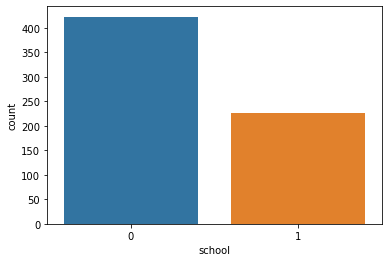

In [14]:
sns.countplot(x='school', data=features);

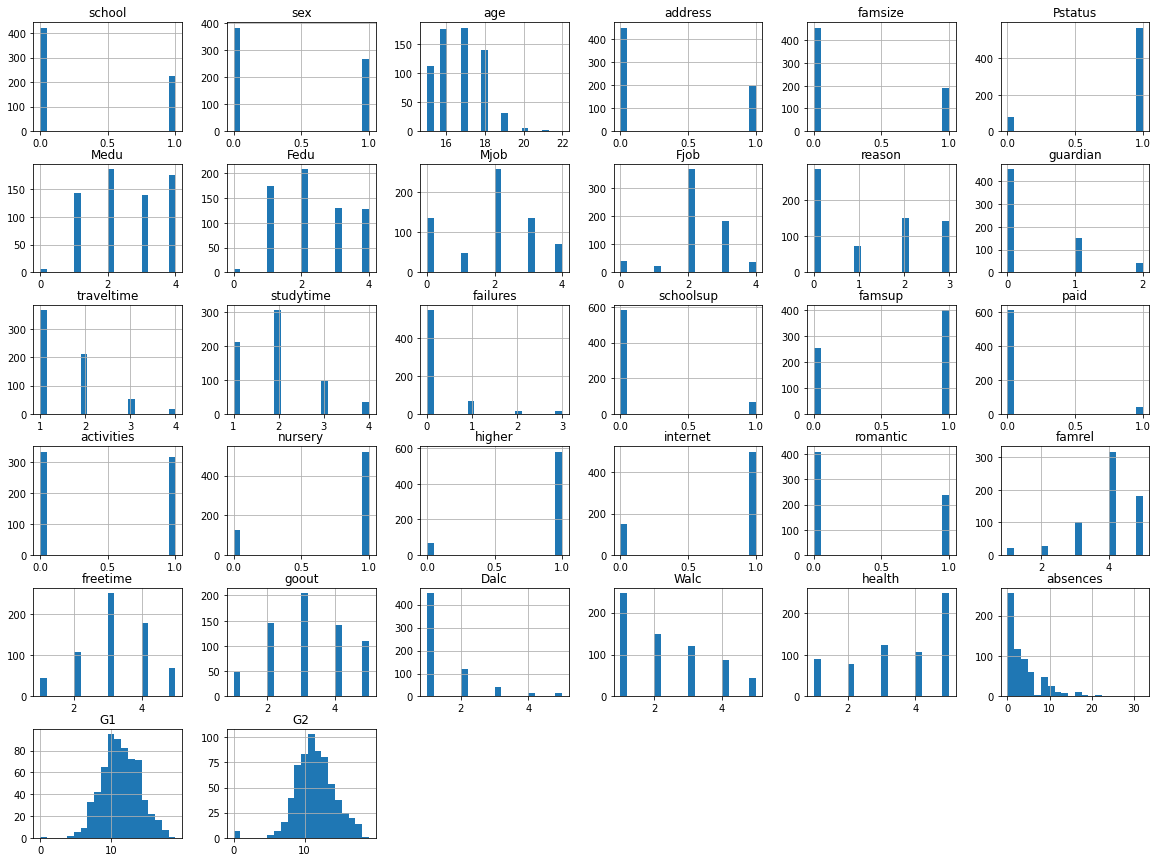

In [15]:
features.hist(bins=20, figsize=(20,15));

In [16]:
len(features_list)

32

In [17]:
df.head(15)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1  services     other   
12     GP   M   15       U     LE3       T     4     4    health  services   
13     GP   M   15       U     GT3       T     4     3   teacher     other   
14     GP   M   15       U     GT3       A     2     2     other     other   

        reason guardian  traveltime  studytime  failures schoolsup famsup  \
0       course   mother           2          2         0       yes     no   
1       course   father           1          2         0        no    yes   
2        other   mother           1          2         0       yes     no   
3         home   mother           1          3         0        no    yes   
4         home   father           1          2         0        no    yes   
5   reputation   mother           1          2         0        no    yes   
6         home   mother           1          2         0        no     no   
7         home   mother           2          2         0       yes    yes   
8         home   mother           1          2         0        no    yes   
9         home   mother           1          2         0        no    yes   
10  reputation   mother           1          2         0        no    yes   
11  reputation   father           3          3         0        no    yes   
12      course   father           1          1         0        no    yes   
13      course   mother           2          2         0        no    yes   
14        home    other           1          3         0        no    yes   

   paid activities nursery higher internet romantic  famrel  freetime  goout  \
0    no         no     yes    yes       no       no       4         3      4   
1    no         no      no    yes      yes       no       5         3      3   
2    no         no     yes    yes      yes       no       4         3      2   
3    no        yes     yes    yes      yes      yes       3         2      2   
4    no         no     yes    yes       no       no       4         3      2   
5    no        yes     yes    yes      yes       no       5         4      2   
6    no         no     yes    yes      yes       no       4         4      4   
7    no         no     yes    yes       no       no       4         1      4   
8    no         no     yes    yes      yes       no       4         2      2   
9    no        yes     yes    yes      yes       no       5         5      1   
10   no         no     yes    yes      yes       no       3         3      3   
11   no        yes     yes    yes      yes       no       5         2      2   
12   no        yes     yes    yes      yes       no       4         3      3   
13   no         no     yes    yes      yes       no       5         4      3   
14   no         no     yes    yes      yes      yes       4         5      2   

    Dalc  Walc  health  absences  G1  G2  G3  
0      1     1       3         4   0  11  11  
1      1     1       3         2   9  11  11  
2      2     3       3         6  12  13  12  
3      1     1       5         0  14  14  14  
4    

In [18]:
x = features
y = target
scaler_x = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()
print(scaler_x.fit(x))
xscale =scaler_x.transform(x)
print(scaler_y.fit(y))
yscale =scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [19]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.3)

In [20]:


# min_max_scaler = preprocessing.MinMaxScaler()
# X_scale = min_max_scaler.fit_transform(features)

# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

# print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)



In [21]:
xscale, yscale

(array([[0.        , 0.        , 0.42857143, ..., 0.125     , 0.        ,
         0.57894737],
        [0.        , 0.        , 0.28571429, ..., 0.0625    , 0.47368421,
         0.57894737],
        [0.        , 0.        , 0.        , ..., 0.1875    , 0.63157895,
         0.68421053],
        ...,
        [1.        , 0.        , 0.42857143, ..., 0.1875    , 0.57894737,
         0.63157895],
        [1.        , 1.        , 0.28571429, ..., 0.1875    , 0.52631579,
         0.52631579],
        [1.        , 1.        , 0.42857143, ..., 0.125     , 0.52631579,
         0.57894737]]),
 array([[0.57894737],
        [0.57894737],
        [0.63157895],
        [0.73684211],
        [0.68421053],
        [0.68421053],
        [0.68421053],
        [0.68421053],
        [0.89473684],
        [0.68421053],
        [0.73684211],
        [0.68421053],
        [0.63157895],
        [0.68421053],
        [0.78947368],
        [0.89473684],
        [0.73684211],
        [0.73684211],
        [0.36

In [22]:
model = Sequential([
    Dense(32, input_dim=32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
])
model.summary()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
model.compile(
    loss='mse', 
    optimizer='adam', 
    metrics=['mse','mae']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=48,  verbose=1, validation_split=0.2)

In [ ]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
df2 = features.iloc[14] # Test with the 14th Student 
Xnew = np.array([df2])
Xnew.reshape(1, -1)
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)

#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)

#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted G3's score is {:.2f}".format(float(ynew[0])))

In [ ]:
loss, mean_sq_e, mean_abs_e = model.evaluate(X_test, y_test, batch_size=1,verbose=0)
print(model.metrics_names)
print("Mean Squared Error : {:.5f}".format(mean_sq_e))
print("Mean Absolute Error : {:.5f}".format(mean_abs_e))

In [ ]:
diff_list = []
large_diff_count = 0
for i in range(0,len(target)):
    print(i)
    df2 = features.iloc[i] # Test with the 14th Student 
    target2 = target.iloc[i].values[0]
    print("Real Values :", target2)
    Xnew = np.array([df2])
    Xnew.reshape(1, -1)
    Xnew= scaler_x.transform(Xnew)
    ynew= model.predict(Xnew)

    #invert normalize
    ynew = scaler_y.inverse_transform(ynew) 
    Xnew = scaler_x.inverse_transform(Xnew)
    predicted = float(ynew[0])
    #print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    print("Predicted G3's score is {:.2f}".format(predicted))
    diff = np.abs(predicted-target2)
    print("Difference : {:.3f}".format(diff))
    diff_list.append(diff)
    
    if diff > mean_abs_e:
        large_diff_count = large_diff_count + 1
print("\nNumber of predicted score that exceed Mean Abs Error : ",large_diff_count)